In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the data file
df_raw = pd.read_csv('spy.csv')

In [37]:
# Examine dataframe
df_raw.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,25.236158,25.236158,25.110605,25.218222,1003200,29,4,4,1,1993
1,1993-02-01,25.236146,25.397572,25.236146,25.397572,480500,1,0,5,2,1993
2,1993-02-02,25.379673,25.469354,25.325865,25.451418,201300,2,1,5,2,1993
3,1993-02-03,25.487270,25.738376,25.469334,25.720440,529400,3,2,5,2,1993
4,1993-02-04,25.810132,25.881876,25.523153,25.828068,531500,4,3,5,2,1993


In [38]:
# Average High and Low colums and examine new dataframe
df_raw['avg'] = (df_raw['High'] + df_raw['Low']) / 2 
df_raw.head()

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year,avg
0,1993-01-29,25.236158,25.236158,25.110605,25.218222,1003200,29,4,4,1,1993,25.173381
1,1993-02-01,25.236146,25.397572,25.236146,25.397572,480500,1,0,5,2,1993,25.316859
2,1993-02-02,25.379673,25.469354,25.325865,25.451418,201300,2,1,5,2,1993,25.397609
3,1993-02-03,25.487270,25.738376,25.469334,25.720440,529400,3,2,5,2,1993,25.603855
4,1993-02-04,25.810132,25.881876,25.523153,25.828068,531500,4,3,5,2,1993,25.702515


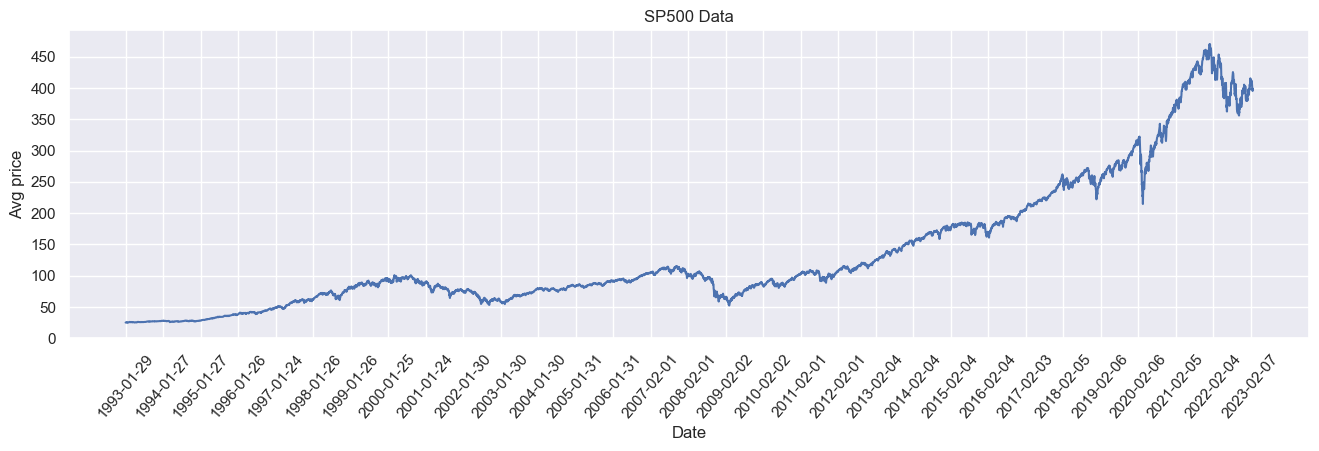

In [39]:
# Plot histogram of average price over time 
sns.set(rc={'figure.figsize':(16, 4)})
ax = sns.lineplot(x=df_raw['Date'], y=df_raw['avg'])
ax.set_xticks(range(0, len(df_raw), 252)) 
ax.set_yticks(range(0, 500, 50))
plt.title('SP500 Data')
plt.xlabel('Date')
plt.ylabel('Avg price')
plt.xticks(rotation=50)
plt.show()

In [40]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [41]:
def lstm_split(data, n, offset):
    # helper function to split data in to chunks usable by LTSM
    x, y = [], []
    for i in range(offset, len(data)):
        x.append(data[i-n:i])
        y.append(data[i])

    return np.array(x), np.array(y)

def rmse_calc(y_true, y_pred):
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    return rmse

def mape_calc(y_true, y_pred):
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [42]:
# Assign x and y
x = df_raw.drop('avg', axis=1)
x = x.drop('Date', axis=1)
y = df_raw['avg']
y = y.values.reshape(-1,1)

# Fit scaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [43]:
# Split data into train & test
split = int(len(df_raw)*.8)

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

In [44]:
# Add and fit model
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)

Epoch 1/50
85/85 - 1s - loss: 0.1963 - val_loss: 2.2300 - 1s/epoch - 15ms/step
Epoch 2/50
85/85 - 0s - loss: 0.0237 - val_loss: 1.7661 - 122ms/epoch - 1ms/step
Epoch 3/50
85/85 - 0s - loss: 0.0101 - val_loss: 1.3548 - 120ms/epoch - 1ms/step
Epoch 4/50
85/85 - 0s - loss: 0.0050 - val_loss: 1.0534 - 118ms/epoch - 1ms/step
Epoch 5/50
85/85 - 0s - loss: 0.0036 - val_loss: 0.8774 - 117ms/epoch - 1ms/step
Epoch 6/50
85/85 - 0s - loss: 0.0031 - val_loss: 0.7955 - 117ms/epoch - 1ms/step
Epoch 7/50
85/85 - 0s - loss: 0.0028 - val_loss: 0.7632 - 118ms/epoch - 1ms/step
Epoch 8/50
85/85 - 0s - loss: 0.0026 - val_loss: 0.7522 - 118ms/epoch - 1ms/step
Epoch 9/50
85/85 - 0s - loss: 0.0024 - val_loss: 0.7505 - 116ms/epoch - 1ms/step
Epoch 10/50
85/85 - 0s - loss: 0.0021 - val_loss: 0.7532 - 118ms/epoch - 1ms/step
Epoch 11/50
85/85 - 0s - loss: 0.0019 - val_loss: 0.7579 - 118ms/epoch - 1ms/step
Epoch 12/50
85/85 - 0s - loss: 0.0017 - val_loss: 0.7631 - 118ms/epoch - 1ms/step
Epoch 13/50
85/85 - 0s - lo

48/48 [==============================] - 0s 648us/step


<Axes: ylabel='Count'>

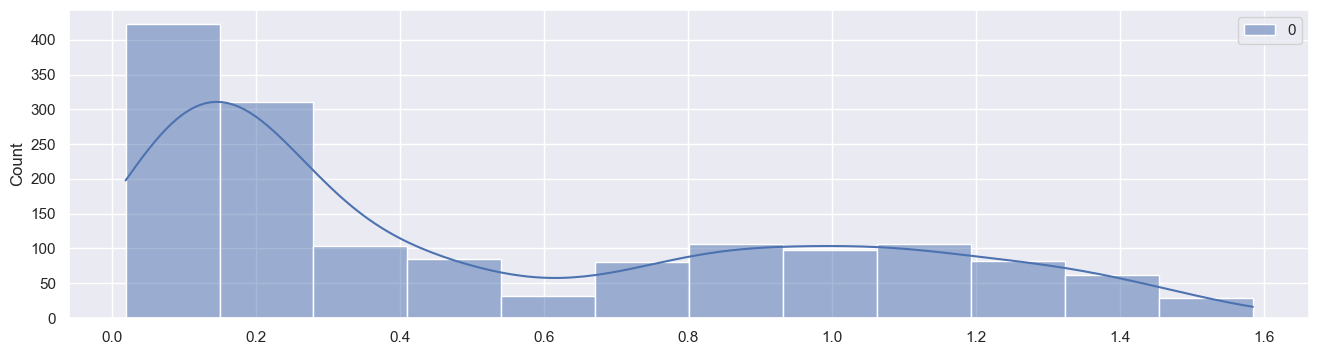

In [52]:
# Calculate errors
y_pred = model.predict(x_test)
error = y_test - y_pred

# Plot errors
sns.histplot((error), kde=True)

Long Short-Term Memory MSE: 0.4795849050565155
Long Short-Term Memory MAE: 0.5245349183489335
Long Short-Term Memory R-squared: 0.09445614309727379


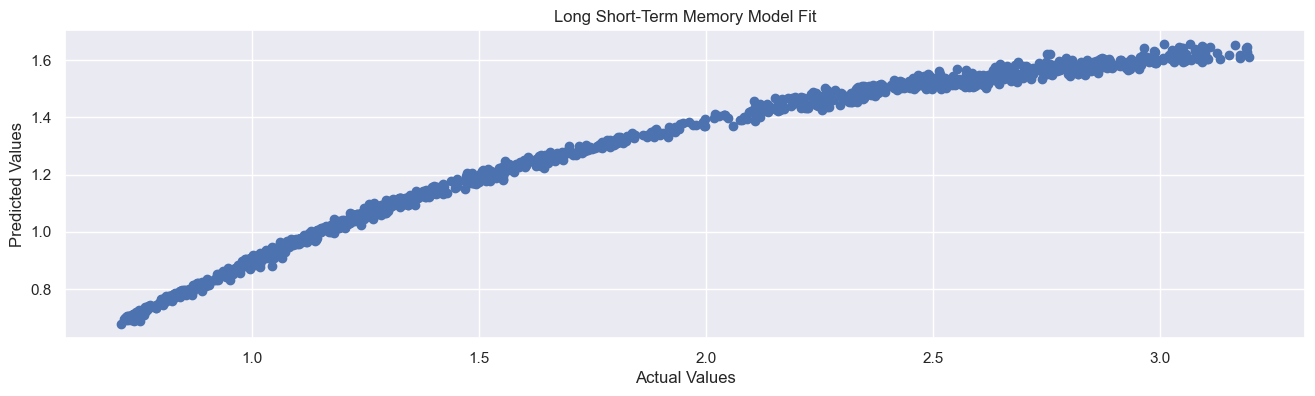

In [55]:
# Calculate Mean Squared Error
lstm_mse = np.mean((y_pred - y_test)**2)
r2 = r2_score(y_test, y_pred)

# Calculate R-squared and Mean Absolute Error
lstm_r2 = r2_score(y_test, y_pred)
lstm_mae = mean_absolute_error(y_test, y_pred)

# Print Long Short-Term Memory Mean Squared Error, Mean Absolute Error, and R-squared
print('Long Short-Term Memory MSE:', lstm_mse)
print('Long Short-Term Memory MAE:', lstm_mae)
print('Long Short-Term Memory R-squared:', lstm_r2)


# Create scatterplot with model fit
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Long Short-Term Memory Model Fit')
plt.show()

Linear Regression MSE: 5.354303898829146e-30
Linear Regression MAE: 2.1360984121979334e-15
Linear Regression R-squared: 1.0


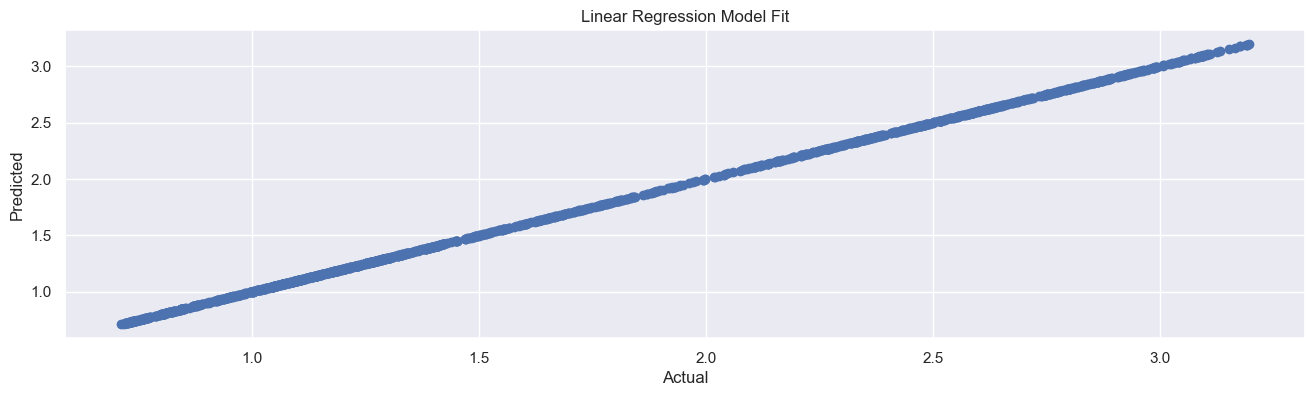

In [57]:
# Linear Regression- Import library
from sklearn.linear_model import LinearRegression

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
lr_pred = lr_model.predict(x_test.reshape(x_test.shape[0], -1))
lr_mse = np.mean((lr_pred - y_test)**2)
lr_mae = mean_absolute_error(y_test, lr_pred)

# Calculate R-squared 
lr_r2 = r2_score(y_test, lr_pred)

# Print Linear Regression Mean Squared Error, Mean Absolute Error, and R-squared
print('Linear Regression MSE:', lr_mse)
print('Linear Regression MAE:', lr_mae)
print('Linear Regression R-squared:', lr_r2)

# Create scatterplot with model fit
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Model Fit')
plt.show()

SVM Regression MSE: 0.954918993481946
SVM Regression MAE: 0.28146933611519587
SVM Regression R-squared: 0.8132824903982784


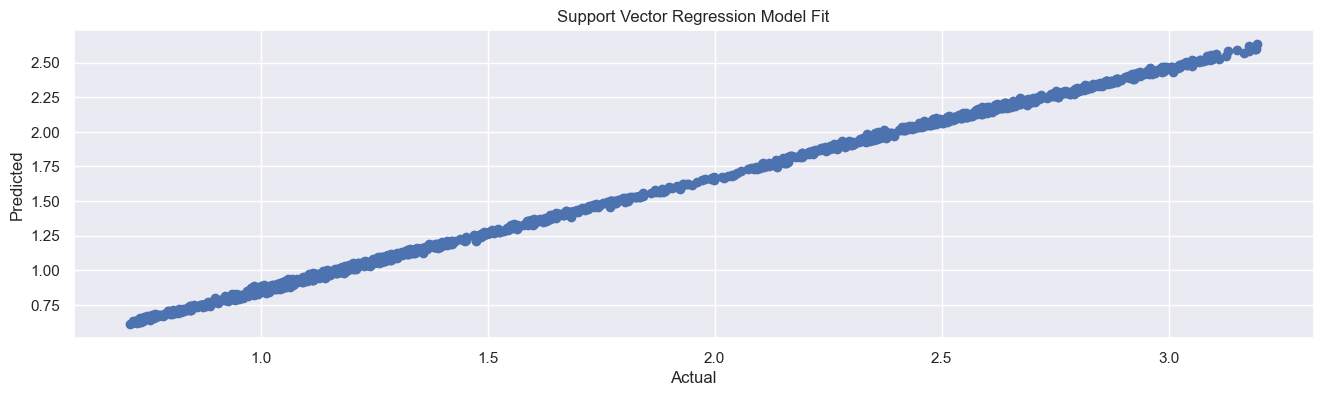

In [58]:
# Support Vector Regression - Import library
from sklearn.svm import SVR

# Support Vector Regression
svm_model = SVR(kernel='linear')
svm_model.fit(x_train.reshape(x_train.shape[0], -1), y_train.ravel())
svm_pred = svm_model.predict(x_test.reshape(x_test.shape[0], -1))
svm_mse = np.mean((svm_pred - y_test)**2)

# Calculate R-squared and mean absolute error
svm_r2 = r2_score(y_test, svm_pred)
svm_mae = mean_absolute_error(y_test, svm_pred)

# Print SVM Mean Squared Error, Mean Absolute Error and R-squared
print('SVM Regression MSE:', svm_mse)
print('SVM Regression MAE:', svm_mae)
print('SVM Regression R-squared:', svm_r2)

# Create scatterplot with model fit
plt.scatter(y_test, svm_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression Model Fit')
plt.show()


Decision Tree Regression MSE: 1.5613750949916638
Decision Tree Regression MAE: 1.015781004900717
Decision Tree Regression R-squared: -1.9480086062917978


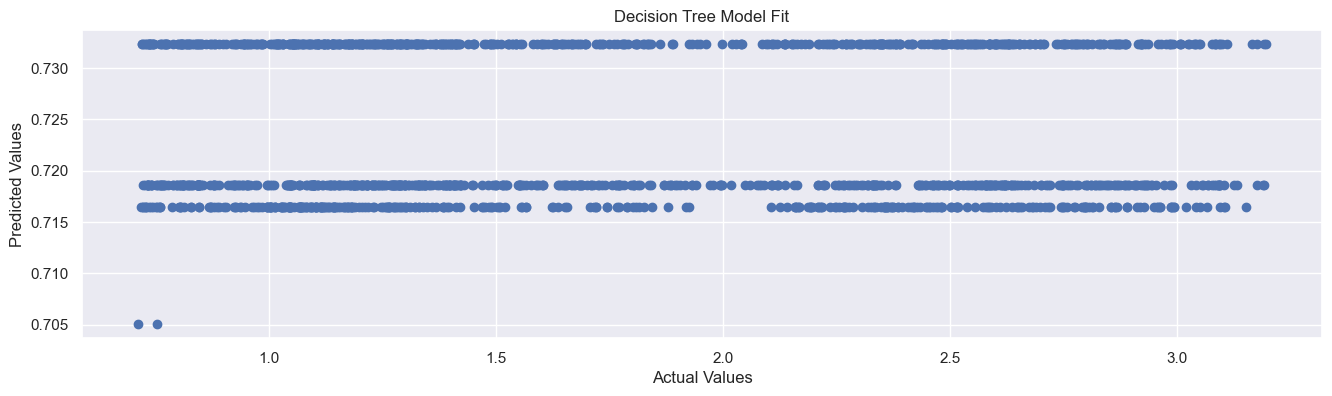

In [49]:
# Decision Tree Regression - Import library
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
dt_pred = dt_model.predict(x_test.reshape(x_test.shape[0], -1))
dt_mse = np.mean((dt_pred - y_test)**2)

# Calculate R-squared and mean absolute error
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

# Print Decision Tree Mean Squared Error, Mean Absolute Error, and R-squared
print('Decision Tree Regression MSE:', dt_mse)
print('Decision Tree Regression MAE:', dt_mae)
print('Decision Tree Regression R-squared:', dt_r2)

# Create scatterplot with model fit
plt.scatter(y_test, dt_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Model Fit')
plt.show()

/Users/aanderson/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regression MSE: 1.5543821001246882
Gradient Boosting Regression MAE: 1.0123148207507127
Gradient Boosting Regression R-squared: -1.9348909172346582


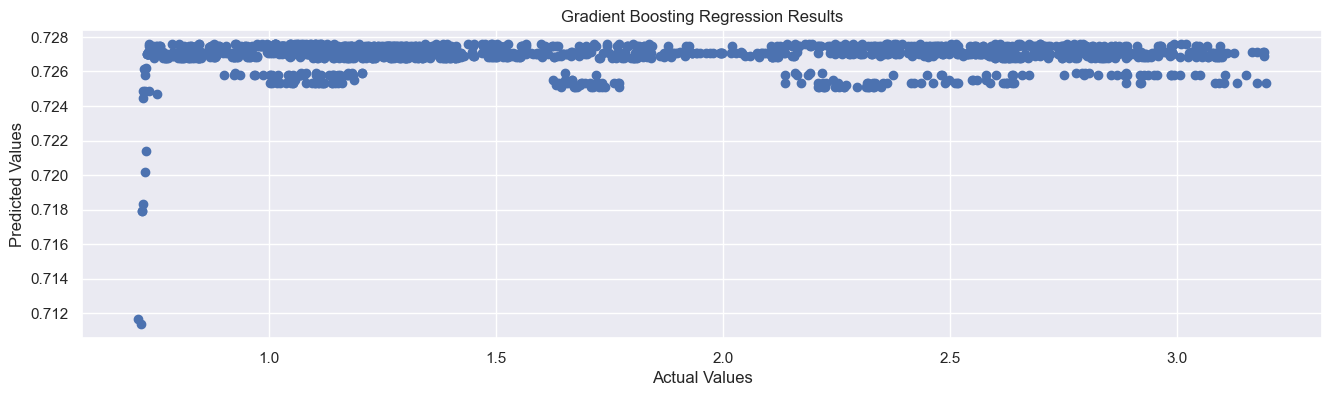

In [50]:
# Gradient Boosting Regression - Import library
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100)
gb_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)
gb_pred = gb_model.predict(x_test.reshape(x_test.shape[0], -1))
gb_mse = np.mean((gb_pred - y_test)**2)

# Calculate R-squared and mean absolute error
gb_r2 = r2_score(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

# Print Gradient Boosting Mean Squared Error, Mean Absolute Error, and R-squared
print('Gradient Boosting Regression MSE:', gb_mse)
print('Gradient Boosting Regression MAE:', gb_mae)
print('Gradient Boosting Regression R-squared:', gb_r2)

# Create scatterplot with model fit
plt.scatter(y_test, gb_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression Results')
plt.show()


Random Forest Regression MSE: 1.5674537285800725
Random Forest Regression MAE: 1.0187469285967679
Random Forest Regression R-squared: -1.9601054380087413


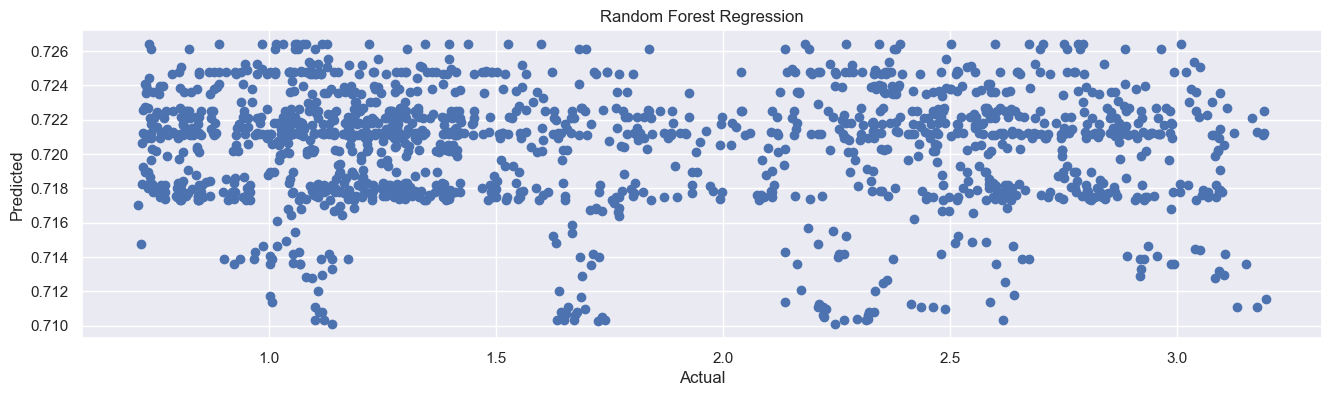

In [51]:
# Random Forest - Import library
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train.reshape(x_train.shape[0], -1), y_train.ravel())
rf_pred = rf_model.predict(x_test.reshape(x_test.shape[0], -1))
rf_mse = np.mean((rf_pred - y_test)**2)

# Calculate R-squared and Mean Absolute Error
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Print Random Forest Mean Squared Error, Mean Absolute Error, and R-squared
print('Random Forest Regression MSE:', rf_mse)
print('Random Forest Regression MAE:', rf_mae)
print('Random Forest Regression R-squared:', rf_r2)

# Create scatterplot with model fit
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Regression")
plt.show()